# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Predictions Infox - Comparaison Bag of Words

---

### Conseils JW
- XGBoost pour données structurées
- Spacy
- Fasttext avec api python : https://fasttext.cc/docs/en/python-module.html
- Comment fusionner les vecteurs de mots : Doc2Vec
- Réseau de neurones : faire petit, metrique AUC
- Word Embedings : https://fasttext.cc/docs/en/crawl-vectors.html


# Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paramètres globaux

In [3]:
random_state = 42

## Données d'entrainement

In [4]:
df_texts_recueil = pd.read_csv('data/demo/221221-TextInfox.csv')

In [5]:
df_texts_recueil

,url,infox,title,article,text
0,https://www.alnas.fr/actualite/communaute/lara...,0.0,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,L’Arabie saoudite organise des célébrations d'...
1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,0.0,« Quel art ! » : un étudiant en droit invente ...,Une professeure de droit a partagé sur Twitter...,« Quel art ! » : un étudiant en droit invente ...
2,https://www.alnas.fr/actualite/politique/laust...,0.0,L’Australie ne reconnaît plus Jérusalem comme ...,Le gouvernement israélien a qualifié la positi...,L’Australie ne reconnaît plus Jérusalem comme ...
3,https://www.alnas.fr/actualite/communaute/nant...,0.0,Nantes : une mère musulmane meurt poignardée e...,NANTES – Une enquête pour « homicide volontair...,Nantes : une mère musulmane meurt poignardée e...
4,https://www.alnas.fr/actualite/en-vrac/la-fran...,0.0,La France condamnée pour avoir placé un enfant...,La Cour européenne des droits de l’Homme (CEDH...,La France condamnée pour avoir placé un enfant...
...,...,...,...,...,...
618,https://fr.sott.net/article/39833-Hubble-confi...,0.0,Hubble confirme que Bernardinelli-Bernstein es...,"La comète C/2002 VQ94 (Linear), avec ses 90 ki...",Hubble confirme que Bernardinelli-Bernstein es...
619,https://fr.novopress.info/219709/vous-regardez...,0.0,Vous regardez Éric Zemmour à la télévision ? D...,La méthode est désormais rodée. Des activistes...,Vous regardez Éric Zemmour à la télévision ? D...
620,https://www.francetvinfo.fr/replay-radio/franc...,0.0,franceinfo passe à table : les tomates farcies,"Chaque jour, un membre de la rédaction de fran...",franceinfo passe à table : les tomates farcies...
621,https://www.francesoir.fr/lifestyle-gastronomi...,0.0,Que contiennent réellement vos pâtes à tartiner?,"Pour certains, c’est le roi du goûter, pour d’...",Que contiennent réellement vos pâtes à tartine...


In [6]:
df_texts_afp =  pd.read_csv('data/demo/221221-TextAfp.csv')

In [7]:
df_texts_afp

,url,title,article,text,infox
0,https://www.francesoir.fr/politique-monde/pres...,Présidentielle au Brésil: Bolsonaro talonne Lu...,L'ex-président de gauche Lula s'est imposé sur...,Présidentielle au Brésil: Bolsonaro talonne Lu...,0.0
1,https://www.francesoir.fr/politique-france/la-...,La France lance un plan de sobriété énergétiqu...,"Monde du sport, du travail, administrations, c...",La France lance un plan de sobriété énergétiqu...,0.0
2,https://www.francesoir.fr/politique-monde/mani...,Manifestations des femmes en Iran contre le po...,Au moins huit personnes ont été tuées lors de ...,Manifestations des femmes en Iran contre le po...,0.0
3,https://www.francesoir.fr/politique-france/aff...,Affaire Quatennens: LFI sous la pression de la...,Les violences faites aux femmes continuent de ...,Affaire Quatennens: LFI sous la pression de la...,0.0
4,https://www.francesoir.fr/politique-monde/covi...,"Covid-19: pour Joe Biden, ""la pandémie est ter...","""The pandemic is over."" Le président américain...","Covid-19: pour Joe Biden, ""la pandémie est ter...",0.0
...,...,...,...,...,...
3232,https://www.francesoir.fr/lifestyle-gastronomi...,La deuxième vie des coquilles d'huîtres,"Les huîtres ont une deuxième vie, du moins leu...",La deuxième vie des coquilles d'huîtres\nLes h...,0.0
3233,https://www.francesoir.fr/lifestyle-gastronomi...,La truffe se fait rare,Victime du réchauffement climatique et d'une m...,La truffe se fait rare\nVictime du réchauffeme...,0.0
3234,https://www.francesoir.fr/lifestyle-gastronomi...,Rungis prépare un Noël opulent malgré les atte...,Malgré les attentats de Paris et la récente ép...,Rungis prépare un Noël opulent malgré les atte...,0.0
3235,https://www.francesoir.fr/lifestyle-gastronomi...,Gastronomie: le Franco-Suisse Benoît Violier m...,Le restaurant du chef cuisinier franco-suisse ...,Gastronomie: le Franco-Suisse Benoît Violier m...,0.0


In [8]:
df_words = pd.read_csv('data/demo/221221-InfoxWords.csv',index_col=0)

In [9]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,115038,24509,139547,False,False,False,False,False,False,False,True,True,True,True,True
la,63754,13149,76903,False,False,False,False,False,False,False,True,True,True,True,True
le,49696,10140,59836,False,False,False,False,False,False,False,True,True,True,True,True
et,38976,10332,49308,False,False,False,False,False,False,False,True,True,True,True,True
les,38274,10533,48807,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
radiologiste,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
sulaimani,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
sulfate,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
sulfatés,0,3,3,False,False,True,True,True,True,True,False,False,False,False,False


In [10]:
ignore_words_small = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index)
ignore_words_medium = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index)
ignore_words_large = list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index)
ignore_words_xlarge = list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index)


# Experience
---

## Feature Engineering

### Preprocessor

In [11]:
import patat.util.text

importlib.reload(patat.util.text)
preprocessor = patat.util.text.preprocess
#preprocessor=None

### Tokenizer

In [12]:
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

tokenizer = lex.get_lemmas_from_text

### TfIdfVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
#afp_size = 3000
#afp_size = 120
#afp_size = 50
afp_size = 20
#afp_size = 0
df_ml = pd.concat([df_texts_recueil,df_texts_afp.sample(afp_size,random_state=random_state)])

In [15]:
%%time
#stop_words = ignore_words_small
#stop_words = ignore_words_medium
stop_words = ignore_words_large
#stop_words = ignore_words_xlarge
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=stop_words)
#vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=stop_words)
count_matrix = vectorizer.fit_transform(df_ml['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

df_X = df_tf
X = df_X

len(df_X.keys())

/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'affilier', 'agir', 'ambitieux', 'assourdir', 'astreindre', 'attraire', 'atténuer', 'automatiser', 'aviser', 'bail', 'bau', 'boire', 'bondir', 'braiser', 'bâtir', 'bénir', 'caractériser', 'chiner', 'circonstancier', 'converger', 'coordonner', 'cristalliser', 'croire', 'cuire', 'cuver', 'différer', 'décrier', 'déculotter', 'déplaire', 'désemparer', 'enrichir', 'envahir', 'fermer', 'glacer', 'granuler', 'généraliser', 'hirondeau', 'industrialiser', 'instruire', 'lyophiliser', 'maudire', 'menacer', 'miner', 'nourrir', 'nébuleu

CPU times: user 471 ms, sys: 16.4 ms, total: 487 ms
Wall time: 487 ms


11601

In [16]:
df_tf

,aa,aaron,abaissement,abaisser,abandon,abandonner,abat,abattage,abattoir,abattre,...,évoluer,évolutif,évolution,évoquer,évènement,événement,évêque,île,îlot,östlund
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.241994,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.049949,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.029126,0.0,0.000000,0.0,0.000000,0.0,0.0
639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.075262,0.0,0.000000,0.0,0.000000,0.0,0.0
640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.051655,0.0,0.000000,0.0,0.076937,0.0,0.0
641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.032719,0.0,0.000000,0.0,0.000000,0.0,0.0


## Benchmark

### Initialisations

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
#from sklearn.metrics import roc_curve

In [18]:
#X = df_X
y=df_ml['infox']

In [19]:
df_X.shape

(643, 11601)

In [23]:
train_size=0.8
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=train_size)

### Benchmark

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import HistGradientBoostingClassifier

In [33]:
predictors = {
    "Logistic Regression" : LogisticRegression(C=1000, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000),
    "Neural Network" : MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state),
#    "RBF SVM" : SVC(gamma=2, C=1, probability=True, random_state=random_state),
#    "Gaussian Naive Bayes" : GaussianNB(),
    "Multinomial Naive Bayes" : MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None),
#    "Nearest Neighbors" : KNeighborsClassifier(3),
#    "Linear SVM" : SVC(kernel="linear", C=0.025, probability=True, random_state=random_state),
    "Gaussian Process" : GaussianProcessClassifier(1.0 * RBF(1.0), random_state=random_state),
#    "Decision Tree" : DecisionTreeClassifier(max_depth=5, random_state=random_state),
#    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=random_state),
#    "AdaBoost" : AdaBoostClassifier(random_state=random_state),
#    "QDA" : QuadraticDiscriminantAnalysis(),
    'Gradient Boosting': HistGradientBoostingClassifier(random_state=random_state),
    'Dummy' : DummyClassifier(strategy='uniform', random_state=random_state),
}


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=0.75)
y_preds = {}
y_probas = {}
fit_times = {}
proba_times = {}

#for name, classifier in zip(names, classifiers):
for name in predictors.keys():
    
    classifier = predictors[name]
    print(f'Training {name}')
    
    start = time.time()
    classifier.fit(X_train, y_train)
    stop = time.time()
    fit_times[name] = stop - start
    
    print(f'Training time : {fit_times[name]} s')
    
    y_preds[name] = classifier.predict(X_test)
    
    start = time.time()
    y_probas[name] = classifier.predict_proba(X_test)
    stop = time.time()
    proba_times[name] = stop - start
print('Done !')

Training Logistic Regression
Training time : 0.1429576873779297 s
Training Neural Network
Training time : 5.797802925109863 s
Training Gaussian Naive Bayes
Training time : 0.05578494071960449 s
Training Multinomial Naive Bayes
Training time : 0.033917903900146484 s
Training Gaussian Process
Training time : 5.072771787643433 s
Training Gradient Boosting
Training time : 14.144972085952759 s
Training Dummy
Training time : 0.00019884109497070312 s
Done !


## Mesure Résultats

### ROC et AUC

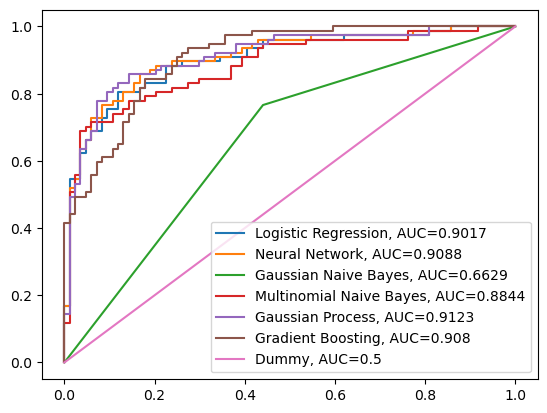

In [27]:
plt.figure(0).clf()
for name in y_probas.keys():
    y_proba = y_probas[name][:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
    plt.plot(fpr,tpr,label=f"{name}, AUC={auc}")
plt.legend()

In [28]:
bench_results = {}
for key in y_preds.keys():
    bench_results[key] = {}
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    bench_results[key]['roc_auc'] = metrics.roc_auc_score(y_test, y_probas[key][:, 1])
    bench_results[key]['accuracy']=metrics.accuracy_score(y_test, y_preds[key])
    bench_results[key]['recall']=metrics.recall_score(y_test, y_preds[key])
    bench_results[key]['f1']=metrics.f1_score(y_test, y_preds[key])
    bench_results[key]['log_loss'] = metrics.log_loss(y_test, y_preds[key])
    cnf_matrix = metrics.confusion_matrix(y_test, y_preds[key],normalize='all')
    bench_results[key]['false_positive']=cnf_matrix[0,1]
    bench_results[key]['false_negative']=cnf_matrix[1,0]
    bench_results[key]['fit_time']=fit_times[key]
    bench_results[key]['proba_time']=proba_times[key]
    

In [29]:
df_bench = pd.DataFrame(bench_results).T
df_bench = df_bench.sort_values('roc_auc',ascending=False)

In [30]:
print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
pd.options.display.float_format = '{:,.4f}'.format

Train size 	482 = 256 False + 226 True
Test size 	161 = 84 False + 77 True



<AxesSubplot: xlabel='roc_auc', ylabel='accuracy'>

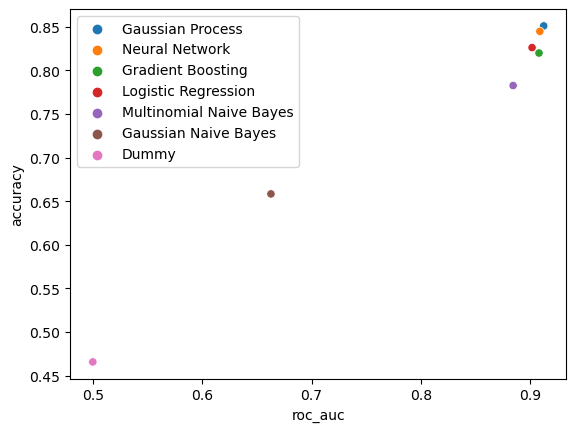

In [31]:
sns.scatterplot(df_bench,y='accuracy',x='roc_auc',hue=df_bench.index)

In [32]:
df_bench

,roc_auc,accuracy,recall,f1,log_loss,false_positive,false_negative,fit_time,proba_time
Gaussian Process,0.9123,0.8509,0.7662,0.8310,5.3730,0.0373,0.1118,5.0728,0.2659
Neural Network,0.9088,0.8447,0.7662,0.8252,5.5968,0.0435,0.1118,5.7978,0.0308
Gradient Boosting,0.9080,0.8199,0.8182,0.8129,6.4923,0.0932,0.0870,14.1450,0.0515
Logistic Regression,0.9017,0.8261,0.7532,0.8056,6.2685,0.0559,0.1180,0.1430,0.0306
Multinomial Naive Bayes,0.8844,0.7826,0.8052,0.7799,7.8356,0.1242,0.0932,0.0339,0.0312
Gaussian Naive Bayes,0.6629,0.6584,0.7662,0.6821,12.3130,0.2298,0.1118,0.0558,0.0367
Dummy,0.5000,0.4658,0.4935,0.4691,19.2531,0.2919,0.2422,0.0002,0.0001


# Sauvegarde des résultats
---

# Conclusions
---
- Framework pour comparer les algorithmes : OK
- Résultats encourageants pour les prédictions.

- 

# Bricolages
---